## Context and Dictionary

###Context

New cellphones are designed, manufactured and sold quite often in this day and age. Because of how long they've been evolving and how many distributors there are, cellphones come with various different features and specs.

This dataset contains about 1,000 different phones from India that show their distributor, specs, price point, make, model and rating. In this practice analysis, I will be finding out which specs are the most relevant for a High Rate phone.


###Dictionary

**model**: This is the model name of the phone. Mostly used as an index.

**brand_name**: This is the brand of the phone.

**price**: This is the price of the phone in the given dataset.

**rating**: This is the average customer rating of the phone.

**has_5g**: This is whether or not the phone supports 5G connectivity. (1 = yes, 0 = no)

**has_nfc**: This is whether or not the phone supports NFC (Near Field Communication). (1 = yes, 0 = no)

**has_ir_blaster**: This is whether or not the phone has an infrared blaster. (1 = yes, 0 = no)

**processor_brand**: This is the brand of the processor inside the phone.

**num_cores**: This is the number of cores in the phone's processor.

**processor_speed**: This is the maximum clock speed of the phone's processor in GHz.

**battery_capacity**: This is the battery capacity of the phone in mAh (milliampere-hour).

**fast_charging_available**: This is whether or not the phone supports fast charging. (1 = yes, 0 = no)

**fast_charging**: This is the maximum fast charging wattage supported by the phone, if available.

**ram_capacity**: This is the RAM capacity of the phone in GB.

**internal_memory**: This is the internal storage capacity of the phone in GB.

**screen_size**: This is the diagonal screen size of the phone in inches.

**refresh_rate**: This is the screen refresh rate of the phone in Hz.

**num_rear_cameras**: This is the number of rear cameras on the phone.

**num_front_cameras**: This is the number of front cameras on the phone.

**os**: This is the operating system of the phone.

**primary_camera_rear**: This is the resolution of the phone's main rear camera in megapixels.

**primary_camera_front**: This is the resolution of the phone's main front camera in megapixels.

**extended_memory_available**: This is whether or not the phone supports external memory expansion. (1 = yes, 0 = no)

**extended_upto**: This is the maximum expandable storage supported by the phone in GB.

**resolution_width**: This is the horizontal resolution of the phone's display in pixels.

**resolution_height**: This is the vertical resolution of the phone's display in pixels.

## Imports and Overview

In [ ]:
!pip install outlier_utils
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from outliers import smirnov_grubbs as grubbs
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
file = '/content/drive/MyDrive/Machine Learning Projects/Smartphones_cleaned_dataset.csv'
df = pd.read_csv(file)
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


## Cleaning and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

### Deal With Outliers

In [ ]:
df['fast_charging_available'] = df['fast_charging_available'].astype(bool)
df['extended_memory_available'] = df['extended_memory_available'].astype(bool)
num_cols = df.select_dtypes(include = 'number').columns.tolist()
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
bool_cols = df.select_dtypes(include = ['bool']).columns.tolist()

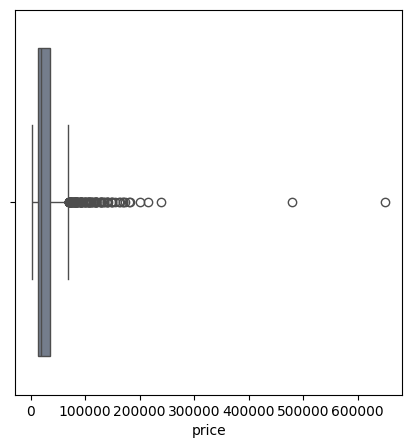

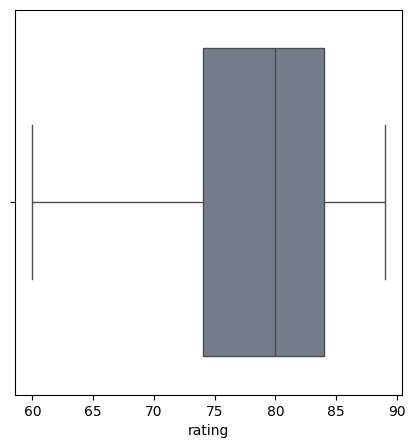

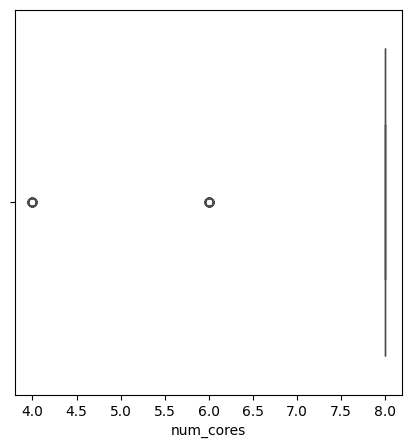

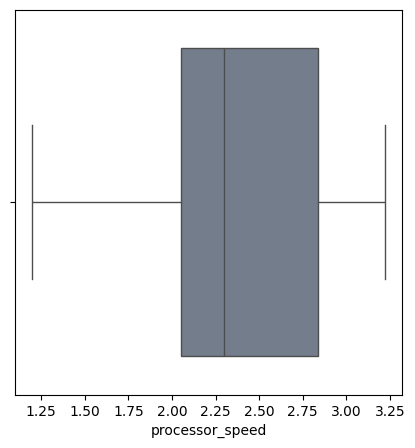

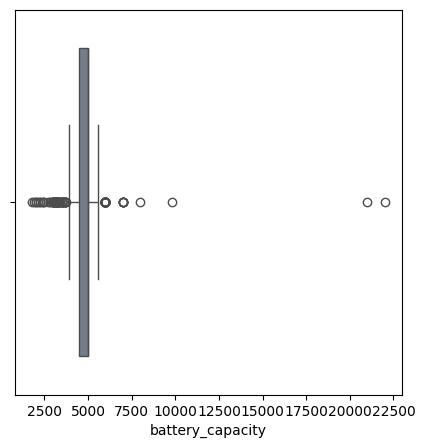

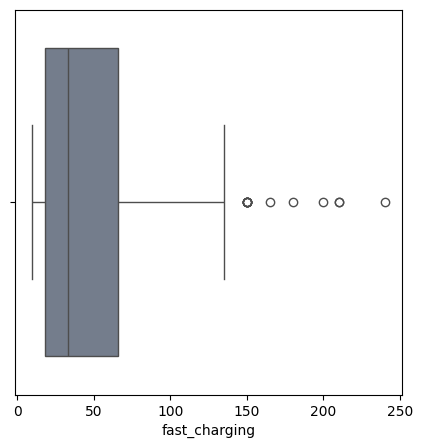

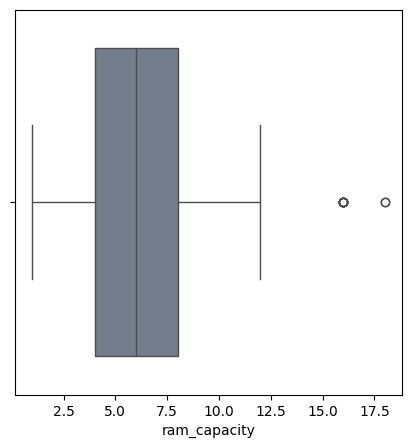

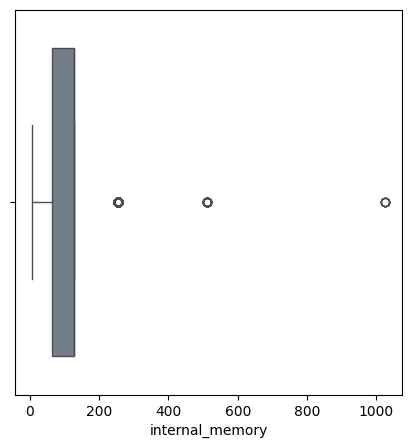

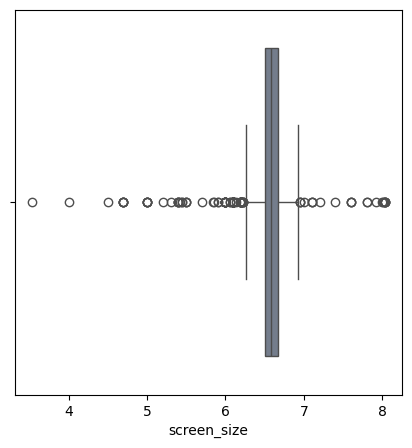

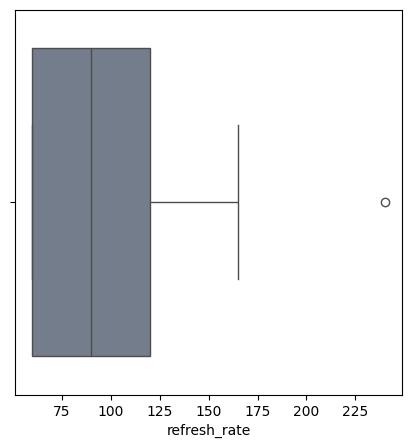

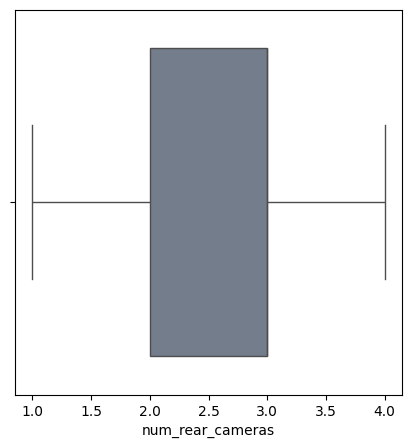

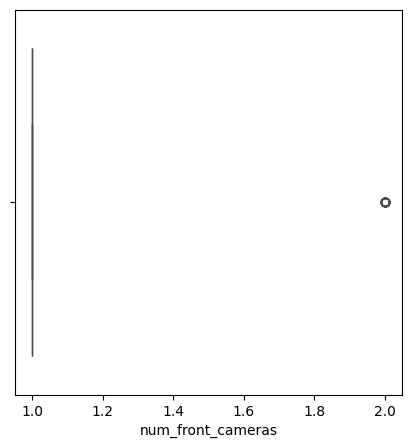

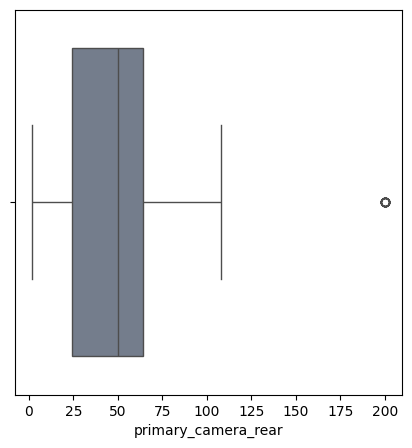

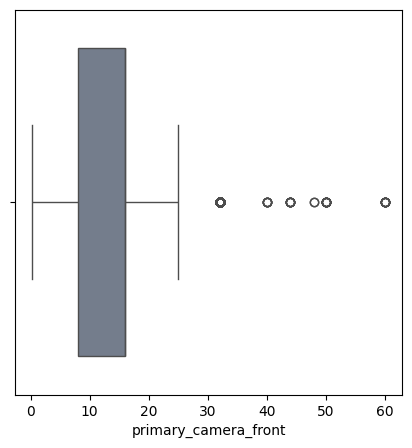

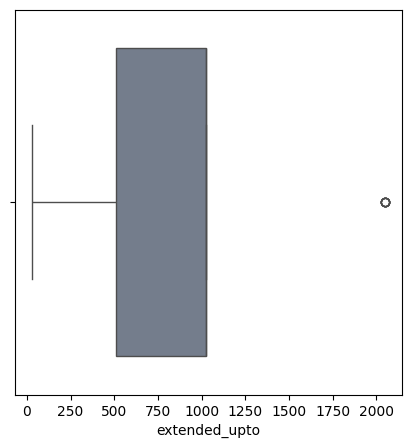

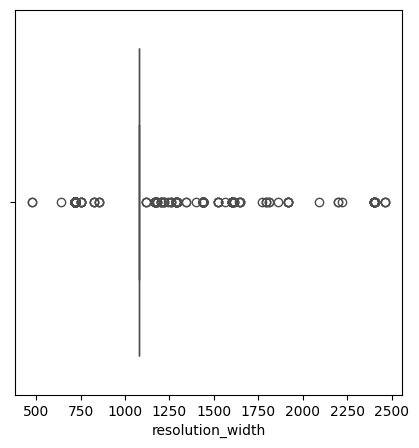

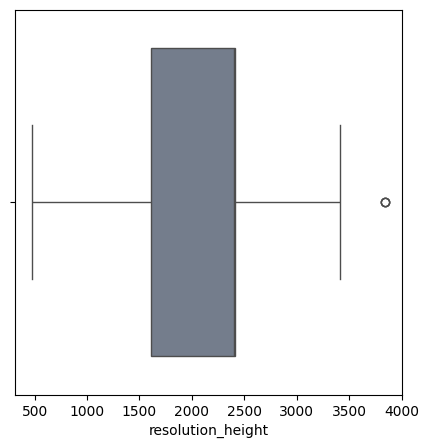

In [ ]:
for i in df[num_cols]:
  plt.figure(figsize = (5,5))
  sns.boxplot(df, x = i, palette = 'bone')
  plt.show()

**Outlier Explanation:**

- [price]: Contains suspicious outliers, 500,000 and 600,000 are a bit high for a phone, but I checked and the phones being described are luxury/signature brands.

- [num_cores]: Most of the phones have 8 cores, but it's possible for a phone to have 4 or 6.

- [battery capacity]: There are a couple of suspect outliers (20,000+ is pretty high for a phone's battery capacity) but I checked the phones and they are specialty athletic phones with super high battery.

- [fast_charging]: There are a few outliers, but it's possible for a phone to charge at 150+ watts.

-  [ram_capacity]: There are a few outliers, but it's possible for a phone to have 15+ gigabytes of RAM.

-  [internal_memory]: There are a few outliers, but it's possible for a phone to have 200+ gigs of memory.

-  [screen_size]: There are a few outliers, but the axis range is reasonable for phone screen sizes.

-  [refresh_rate]: There is an outlier, but the phone with the 240Hz refresh rate is a luxury brand.

-  [primary_camera_rear]: There are some outliers, but 200 MP is high but reasonable for a rear camera sensor.

-  [primary_camera_front]: There are some outliers, but 40-60 MP is high but reasonable for a front camera sensor.

-  [extended_upto]: There are some outliers, but I checked the phone models, and all the phones with 2048+ gig SD cards are valid.

- [resolution_width]: The mode for this column is pretty overpowering, but the range of values for a screens resolution width is reasonable.

- [resolution_height]: There are only a few outliers and they're barely above the 75th percentile.

SO, there are a variety of columns and outliers, but everything in this dataset checks out. I'll leave them in, but I will clip a couple of the small/extreme ones to preserve visualization integrity without messing with the data too much.

In [ ]:
df['price'] = df['price'].clip(upper = 300000)

df['battery_capacity'] = df['battery_capacity'].clip(lower = 7500)

df['resolution_height'] = df['resolution_height'].clip(lower = 2000, upper = 3500)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    bool   
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

### Deal With Missing Values

According to the info above, it looks like we have some missing values. Here, I will try and figure out the best way to fill in each one. I will start by checking how many missing values, unique values and their range for each column containing missing values. I can do this cleanly with a for loop.

In [ ]:
null = ['rating','brand_name',
        'processor_speed',
        'battery_capacity',
        'fast_charging',
        'num_front_cameras',
        'os',
        'primary_camera_front',
        'extended_upto'
        ]

for i in df[null]:
  print(i)
  print('There are ', df[i].isnull().sum(), ' missing values.')
  print('These are the unique values: ', df[i].unique())
  print('Number of unique values: ', df[i].nunique())
  print('\n')

rating
There are  101  missing values.
These are the unique values:  [89. 81. 75. 82. 80. 86. 85. 84. 79. nan 65. 72. 76. 87. 88. 83. 73. 64.
 68. 74. 78. 62. 66. 69. 67. 71. 77. 61. 60. 63. 70.]
Number of unique values:  30


brand_name
There are  0  missing values.
These are the unique values:  ['oneplus' 'samsung' 'motorola' 'realme' 'apple' 'xiaomi' 'nothing' 'oppo'
 'vivo' 'poco' 'iqoo' 'jio' 'gionee' 'tecno' 'tesla' 'google' 'infinix'
 'cola' 'letv' 'ikall' 'leeco' 'duoqin' 'nokia' 'lava' 'honor' 'nubia'
 'redmi' 'asus' 'itel' 'royole' 'sony' 'oukitel' 'vertu' 'blu' 'lyf'
 'huawei' 'zte' 'lenovo' 'lg' 'micromax' 'leitz' 'cat' 'doogee' 'tcl'
 'sharp' 'blackview']
Number of unique values:  46


processor_speed
There are  42  missing values.
These are the unique values:  [3.2  2.2  2.4  2.6  3.22 2.5  3.   2.3  2.85 2.   2.84  nan 2.65 2.9
 2.36 1.8  3.1  2.05 3.05 1.4  1.82 1.6  2.8  1.3  2.73 2.7  1.5  2.96
 2.35 2.37 3.13 1.99 2.86 1.95 2.1  1.2 ]
Number of unique values:  35


b

There are some columns that are numeric and have a high number of unique values. These are usually filled in by the mean or the median, depending on the difference between the two. Let's look and decide below.

In [ ]:
null_num = ['rating',
            'processor_speed',
            'battery_capacity',
            'primary_camera_front',
            ]

for i in df[null_num]:
  median = df[i].median()
  mean = df[i].mean()
  print(f'The median for {i} is {median}')
  print(f'The mean for {i} is {mean}')
  print(f'The difference of {i} is {mean - median}')
  print('\n')

The median for rating is 80.0
The mean for rating is 78.25824800910125
The difference of rating is -1.7417519908987487


The median for processor_speed is 2.3
The mean for processor_speed is 2.427217484008529
The difference of processor_speed is 0.12721748400852917


The median for battery_capacity is 7500.0
The mean for battery_capacity is 7531.785345717234
The difference of battery_capacity is 31.785345717234122


The median for primary_camera_front is 16.0
The mean for primary_camera_front is 16.5891282051282
The difference of primary_camera_front is 0.5891282051282012




It is safe to fill in all of these with the mean, as the difference between the mean and the median isn't too high relative to each column.

In [ ]:
for i in df[null_num]:
  mean = df[i].mean()
  df[i].fillna(mean, inplace = True)

df[null_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                980 non-null    float64
 1   processor_speed       980 non-null    float64
 2   battery_capacity      980 non-null    float64
 3   primary_camera_front  980 non-null    float64
dtypes: float64(4)
memory usage: 30.8 KB


With those out of the way, the other columns require more specific tweaks.

In [ ]:
df['brand_name'] = df['brand_name'].fillna('No Data') #No reliable way to fill.

df['processor_brand'] = df['processor_brand'].fillna('No Data') #No reliable way to fill.

mode = df['num_front_cameras'].mode()[0]
df['num_front_cameras'] = df['num_front_cameras'].fillna(mode) #Only 2 unique values, and only 4 missing.

df['os'] = df['os'].fillna('No Data') #No reliable way to fill.

mode = df['num_cores'].mode()[0]
df['num_cores'] = df['num_cores'].fillna(mode) #Few unique values.

#fast_charging (level) and extended_upto will be left alone, as there are too many null values. Filling them would compromise the inetegrity of the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    bool   
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

I'll save the cleaned data here to upload to Tableau.

In [ ]:
df.to_csv('phones_final.csv', index = False, encoding='utf-8-sig')

Now all missing values and outliers have been properly dealt with.


## Data Analysis:

For this dataset, I want to compare the overall phone feature distributions with the High Rate (HR) phone and Low Rate (LR) phone feature distributions. I will do this using histograms, barplots and pie charts. Let's start by checking the overall rating distribution.

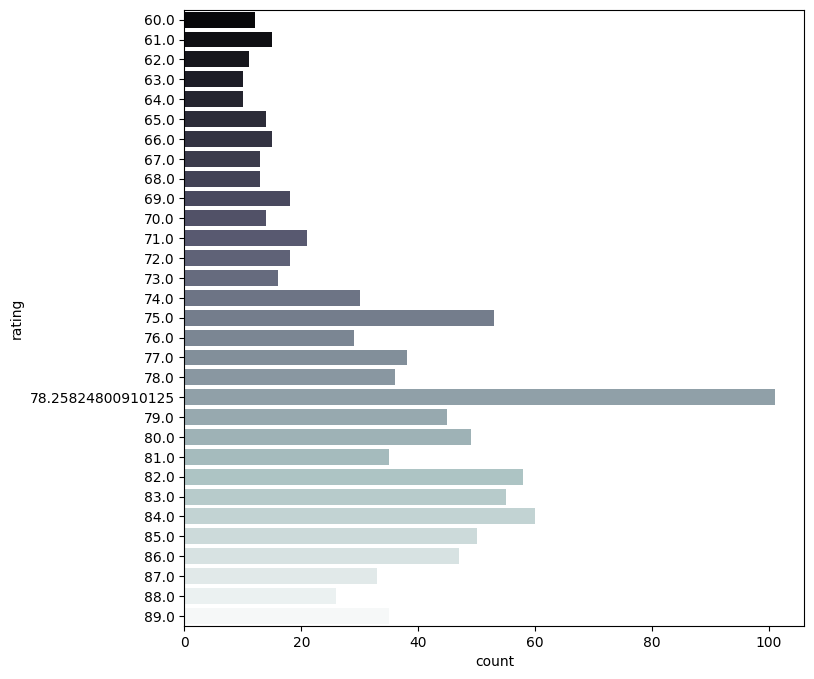

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(df, y = 'rating', palette = 'bone')
plt.show()

In [ ]:
high_rate = df.nlargest(300, 'rating')
low_rate = df.nsmallest(300, 'rating')
print(high_rate.shape)
print(low_rate.shape)

(300, 26)
(300, 26)


Now that the data has been split, I'll start with the categorical distributions.

In [ ]:
cat_list = ['has_nfc',
            'has_ir_blaster',
            'has_5g',
            'os',
            'fast_charging_available',
            'extended_memory_available'
            ] #These are the object/boolean columns that can be cleanly plotted into pie charts.

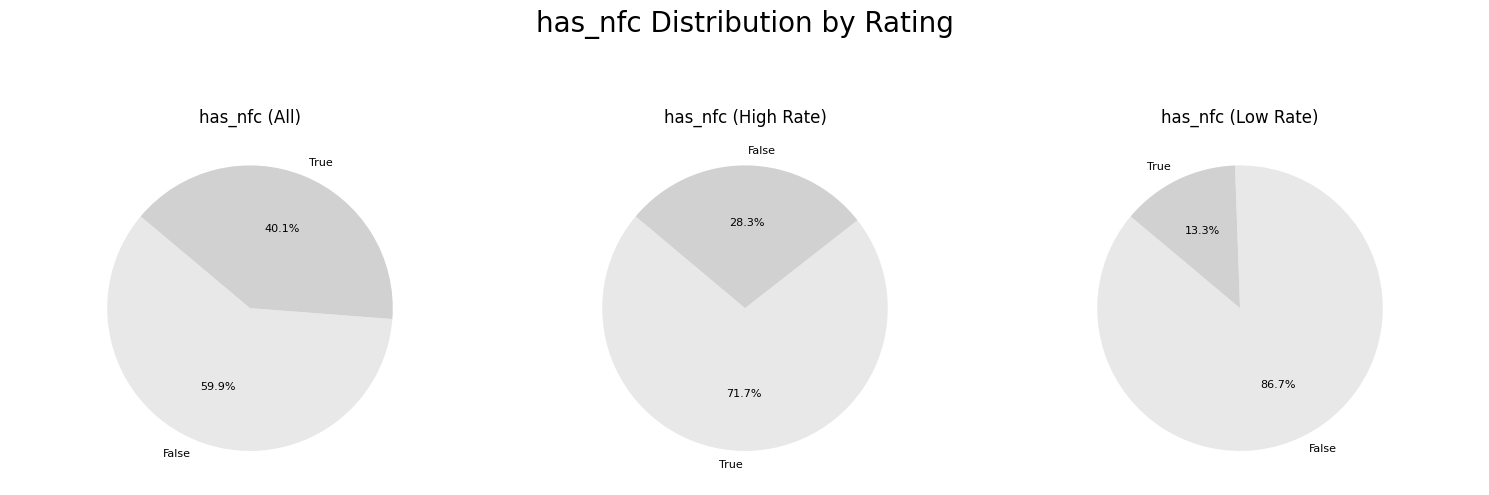

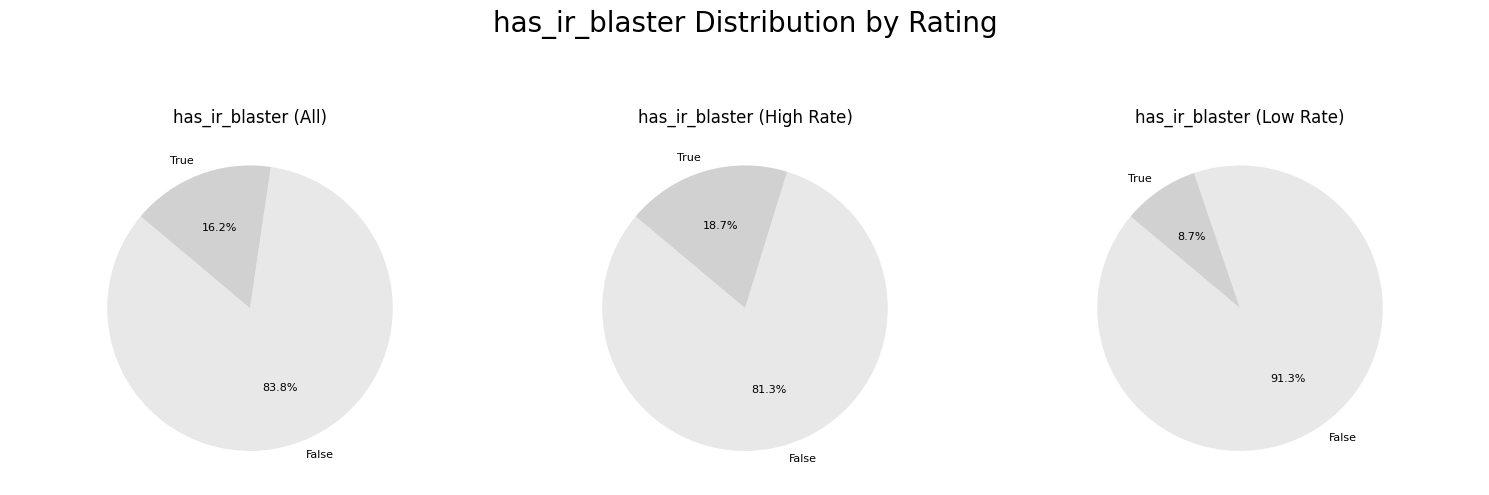

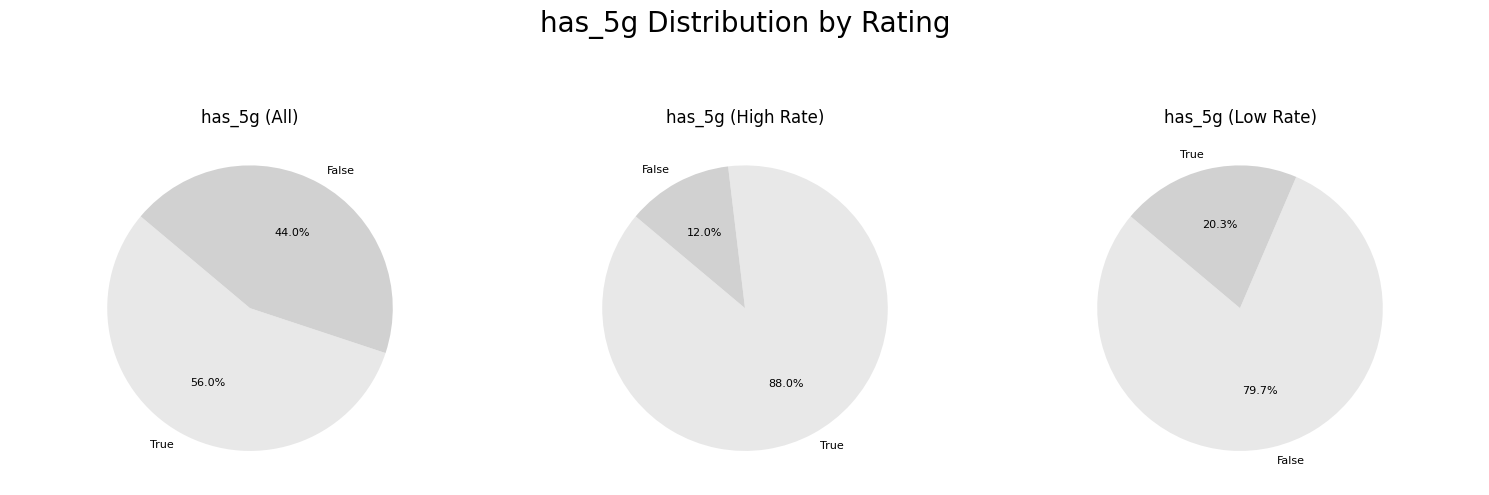

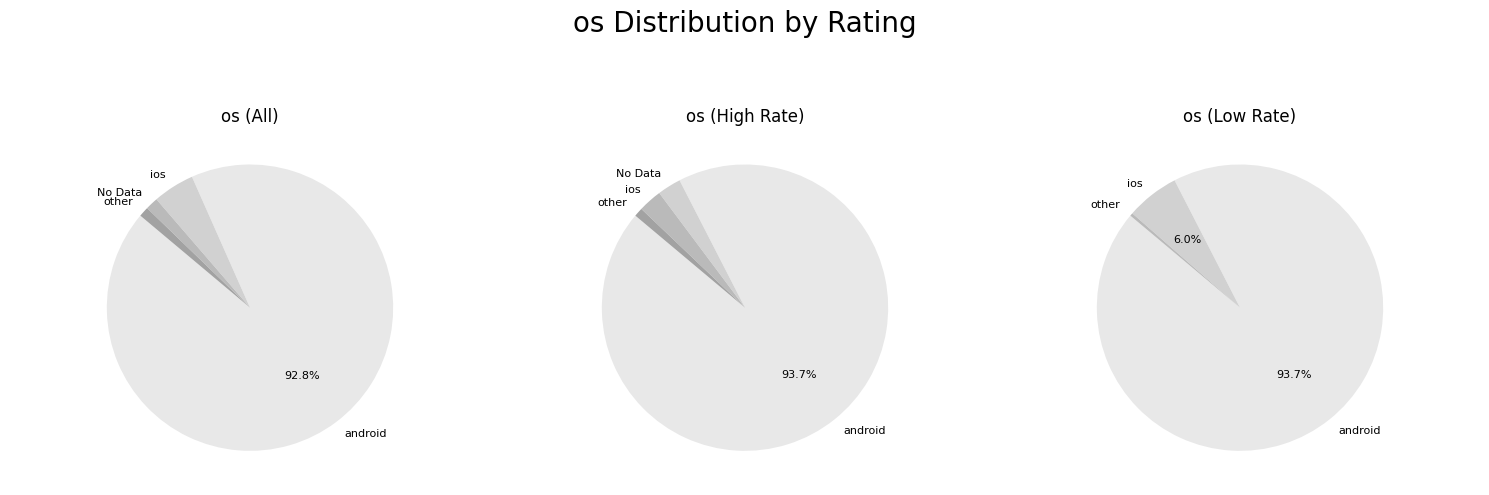

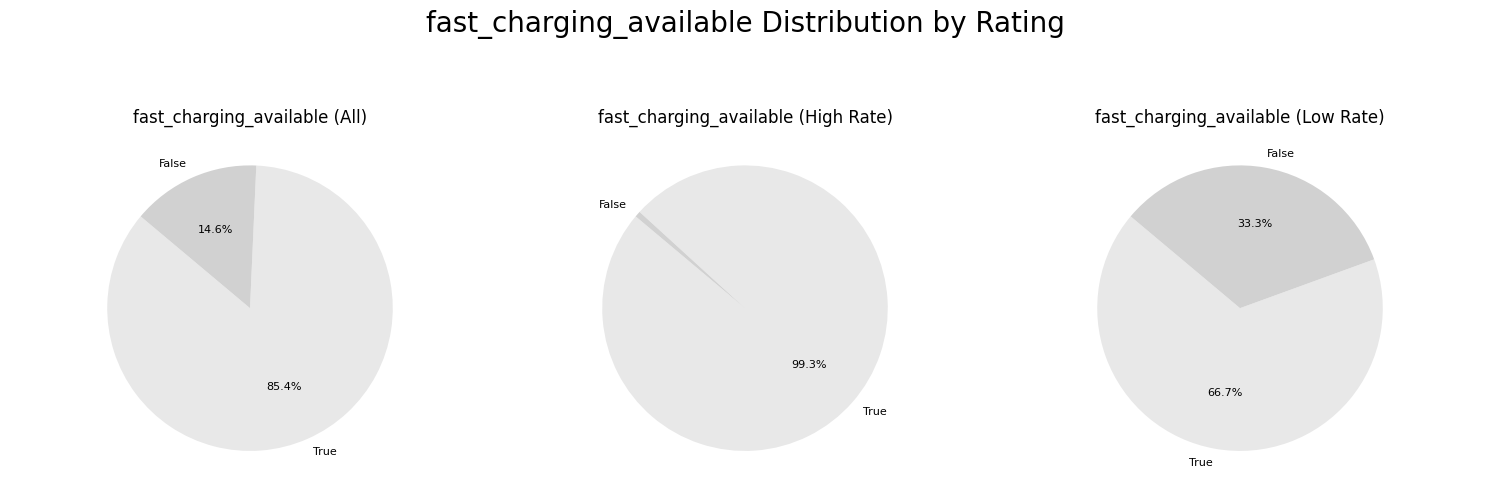

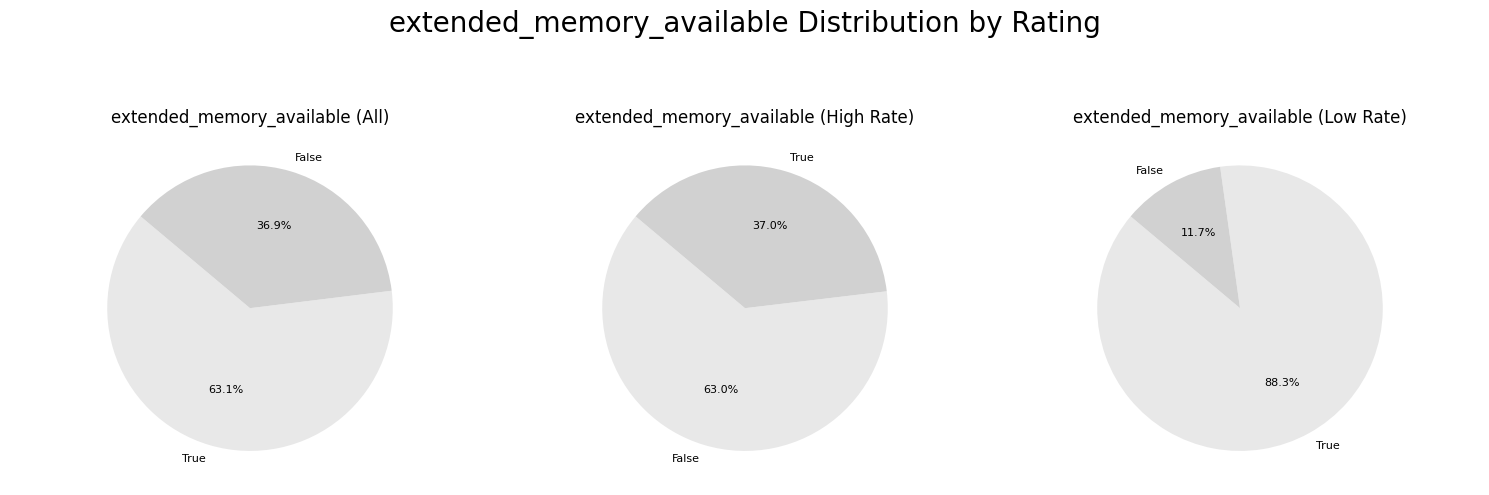

In [ ]:
palette = sns.color_palette('binary', n_colors = 10)

for col in cat_list:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, dataset in enumerate([df, high_rate, low_rate]):
        counts = dataset[col].value_counts()
        labels = counts.index
        sizes = counts.values
        colors = palette[:len(labels)]

        ax[i].pie(
            sizes,
            labels=labels,
            colors=colors,
            autopct=lambda pct: f'{pct:.1f}%' if pct >= 5 else '',
            textprops={'fontsize': 8},
            startangle=140
        )

        title_suffix = ['(All)', '(High Rate)', '(Low Rate)'][i]
        ax[i].set_title(f'{col} {title_suffix}')
        ax[i].axis('equal')

    plt.suptitle(f'{col} Distribution by Rating', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.show()

**Observations:**

[has_nfc]: HIGH PRIORITY

- Most phones in the dataset have nfc. It's a 60/40 split.

- 70% of HR phones have nfc.

- 14% of LR phones have nfc.

[has_ir_blaster]: LOW PRIORITY

- Most phones in the dataset (over 80%) do NOT have an ir blaster. This distribution applies to both LR and HR phones.

[has_5g]: HIGH PRIORITY

- Most phones in the dataset have 5g. It's a 60/40 split.

- 5g is basically mandatory for an HR phone. 93% of HR phones have 5g.

- 21% of LR phones have 5g.

[os]: LOW PRIORITY

- Almost all phones in the dataset (over 90%) use an android operating system. This applies to both HR and LR phones.

[fast_charging_available]: HIGH PRIORITY

- Most phones in the dataset (over 80%) have fast charging available.

- A whopping 99% of HR phones have fast charging.

- Only 67% of LR phones have fast charging.

[extended_memory_available]: HIGH PRIORITY/ANOMALY

- Most phones in the dataset have extended memory available. it's a 60/40 split.

- There is an anomaly. Only 37% of HR phones have extended memory. Meanwhile a whopping 88% of LR phones have it.

- One could conclude that it is bad for the phones rating to invest in extended memory.

[brand_name] and [processor_brand] are more readable as bar charts, so I will put them over here. We'll start with [processor_brand]:

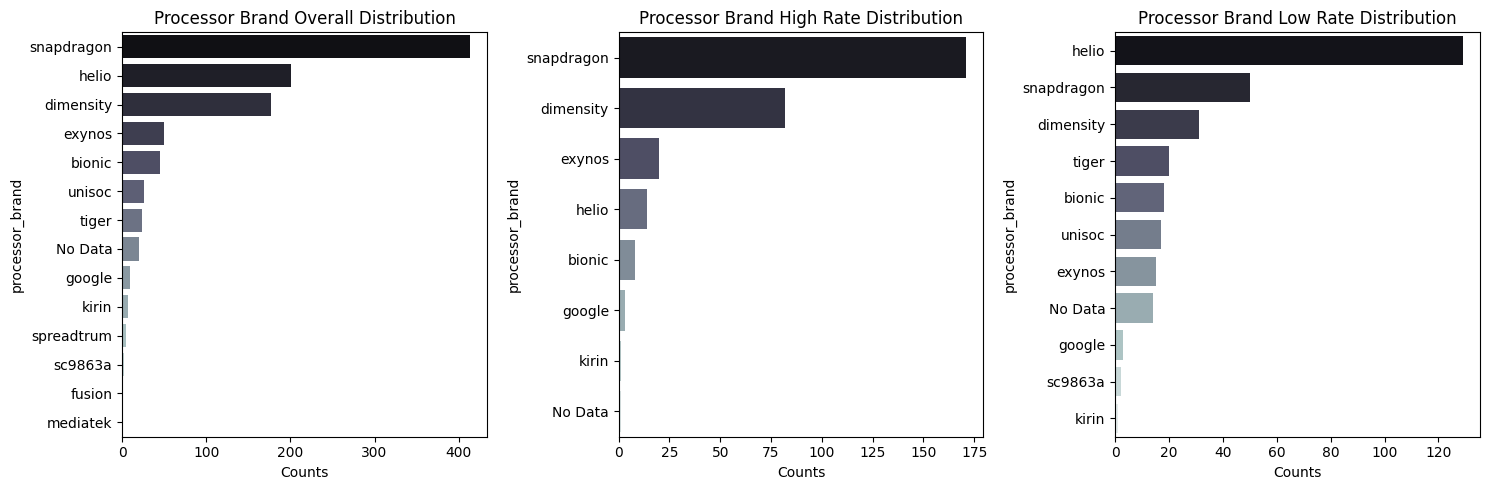

In [ ]:
p_counts = df['processor_brand'].value_counts().reset_index()
p_counts.columns = ['processor_brand', 'Counts']
ph_counts = high_rate['processor_brand'].value_counts().reset_index()
ph_counts.columns = ['processor_brand', 'Counts']
pl_counts = low_rate['processor_brand'].value_counts().reset_index()
pl_counts.columns = ['processor_brand', 'Counts']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

ax[0] = sns.barplot(p_counts, x = 'Counts', y = 'processor_brand', palette = 'bone', ax = ax[0])
ax[0].set_title('Processor Brand Overall Distribution')

ax[1] = sns.barplot(ph_counts, x = 'Counts', y = 'processor_brand', palette = 'bone', ax = ax[1])
ax[1].set_title('Processor Brand High Rate Distribution')

ax[2] = sns.barplot(pl_counts, x = 'Counts', y = 'processor_brand', palette = 'bone', ax = ax[2])
ax[2].set_title('Processor Brand Low Rate Distribution')

plt.tight_layout()

plt.show()

**Observations:**

HIGH PRIORITY

- The top 3 processors take up the most real estate: Snapdragon, Helio and Dimensity.

- Snapdragon is overwhelmingly high, almost 50% higher than second place. The distribution is similar in HR phones.

- It seems as though Helio is very associated with LR phones.

[brand_name] is a bit trickier because we have quite a few unique values. I'll just look at the raw numbers and see if I can pick a cutoff for relevancy.

In [ ]:
brand_counts = df['brand_name'].value_counts().reset_index()
brand_counts

,brand_name,count
0,xiaomi,134
1,samsung,132
2,vivo,111
3,realme,97
4,oppo,88
5,motorola,52
6,apple,46
7,oneplus,42
8,poco,41
9,tecno,33


I will put the cutoff at a count of 10+. This will only take the top 15 or so and collect around 85% of the data to make for easier plotting.

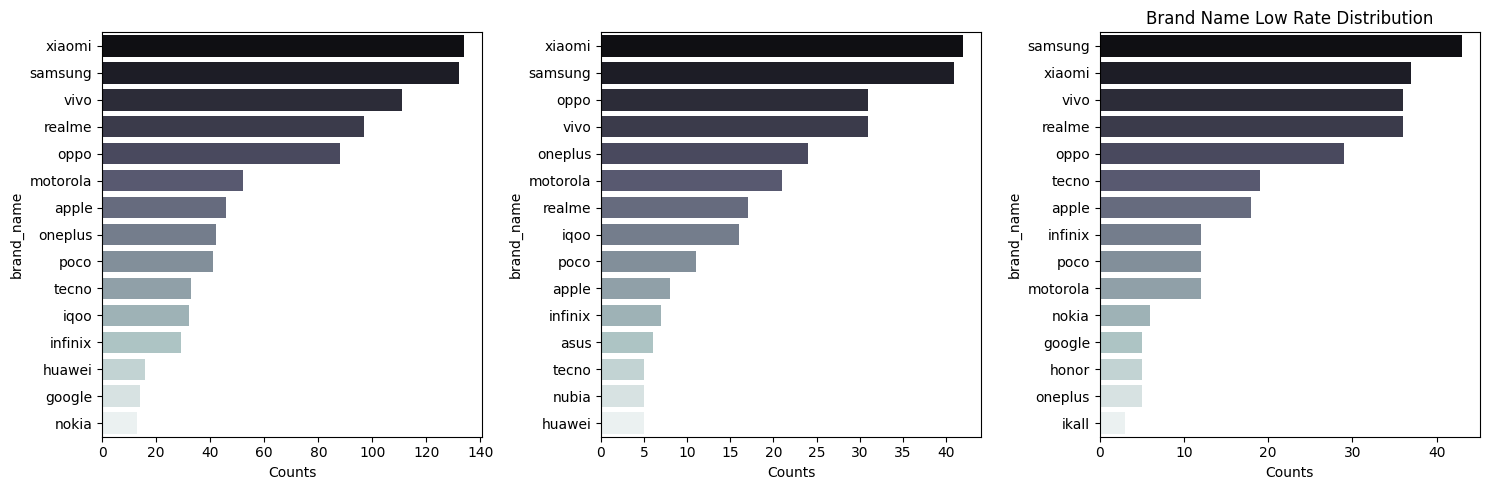

In [ ]:
b_counts = df['brand_name'].value_counts().reset_index(name = 'Counts').nlargest(15, 'Counts')
bh_counts = high_rate['brand_name'].value_counts().reset_index(name = 'Counts').nlargest(15, 'Counts')
bl_counts = low_rate['brand_name'].value_counts().reset_index(name = 'Counts').nlargest(15, 'Counts')


fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

ax[0] = sns.barplot(b_counts, x = 'Counts', y = 'brand_name', palette = 'bone', ax = ax[0])
plt.title('Brand Name Overall Distribution')

ax[1] = sns.barplot(bh_counts, x = 'Counts', y = 'brand_name', palette = 'bone', ax = ax[1])
plt.title('Brand Name High Rate Distribution')

ax[2] = sns.barplot(bl_counts, x = 'Counts', y = 'brand_name', palette = 'bone', ax = ax[2])
plt.title('Brand Name Low Rate Distribution')

plt.tight_layout()

plt.show()

**Observations:**

LOW PRIORITY

- The top 3 brands are Xiaomi, Samsung and Vivo.

Next I will look at the numeric data. Because we are working with phone specs here, some numeric data behaves more like categorical data, and actually looks better as a bar chart instead of a histogram. I will determine which is which by checking the unique values for each numeric column and then splitting the columns names into lists.

In [ ]:
for i in df[num_cols]:
  print(i)
  print('Number of unique values: ', df[i].nunique())
  print('\n')

price
Number of unique values:  378


rating
Number of unique values:  31


num_cores
Number of unique values:  3


processor_speed
Number of unique values:  36


battery_capacity
Number of unique values:  6


fast_charging
Number of unique values:  32


ram_capacity
Number of unique values:  9


internal_memory
Number of unique values:  8


screen_size
Number of unique values:  79


refresh_rate
Number of unique values:  6


num_rear_cameras
Number of unique values:  4


num_front_cameras
Number of unique values:  2


primary_camera_rear
Number of unique values:  18


primary_camera_front
Number of unique values:  25


extended_upto
Number of unique values:  7


resolution_width
Number of unique values:  40


resolution_height
Number of unique values:  45




In [ ]:
hist_cols = ['price',
             'processor_speed',
             'battery_capacity',
             'fast_charging',
             'screen_size',
             'resolution_width',
             'resolution_height']

bar_cols = ['num_cores',
            'ram_capacity',
            'internal_memory',
            'refresh_rate',
            'num_rear_cameras',
            'num_front_cameras',
            'primary_camera_rear',
            'primary_camera_front',
            'extended_upto']

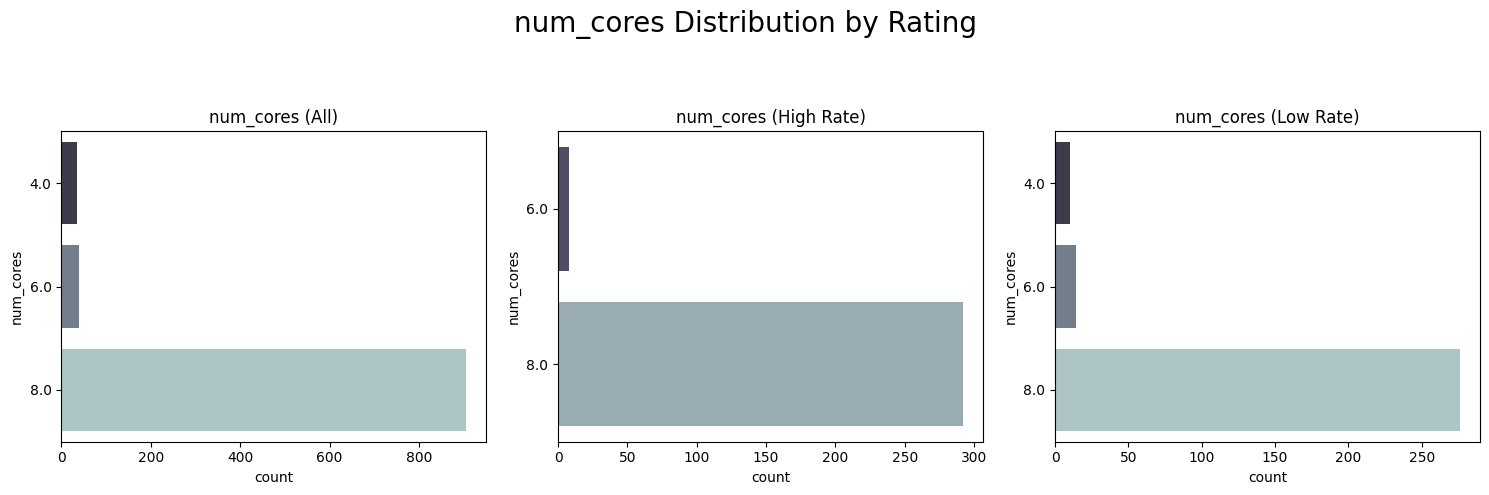

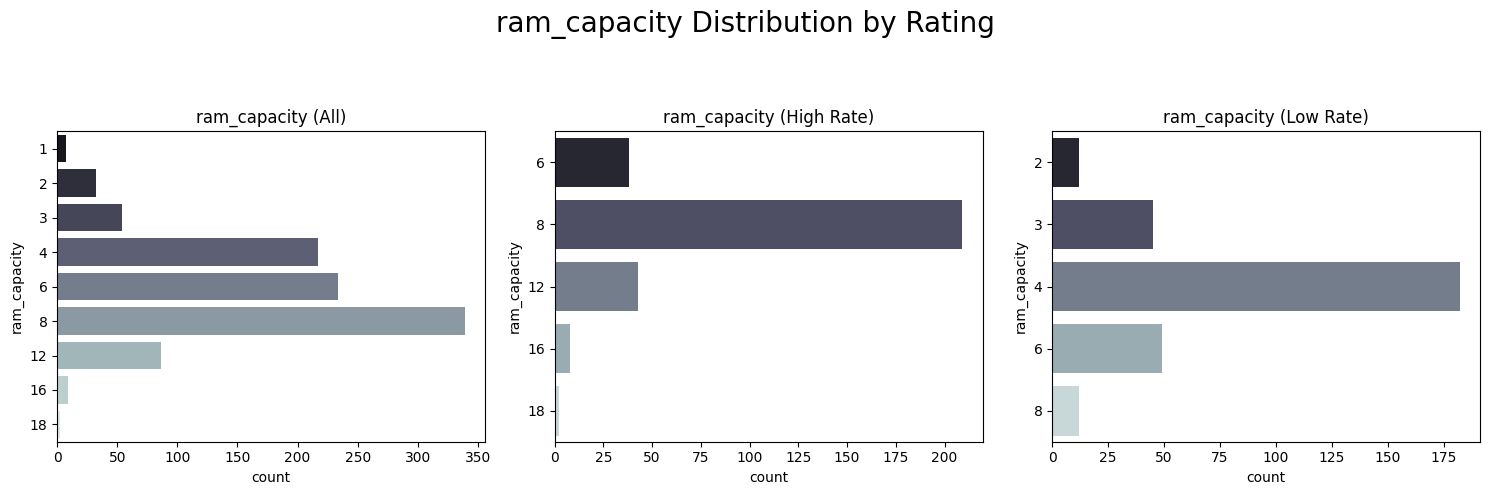

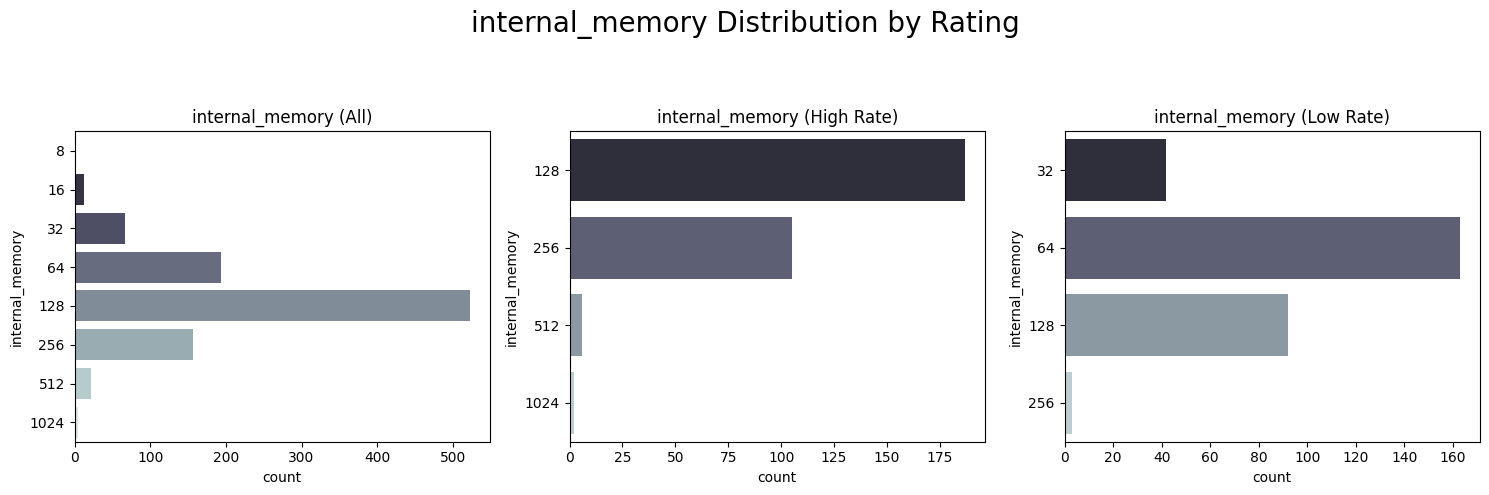

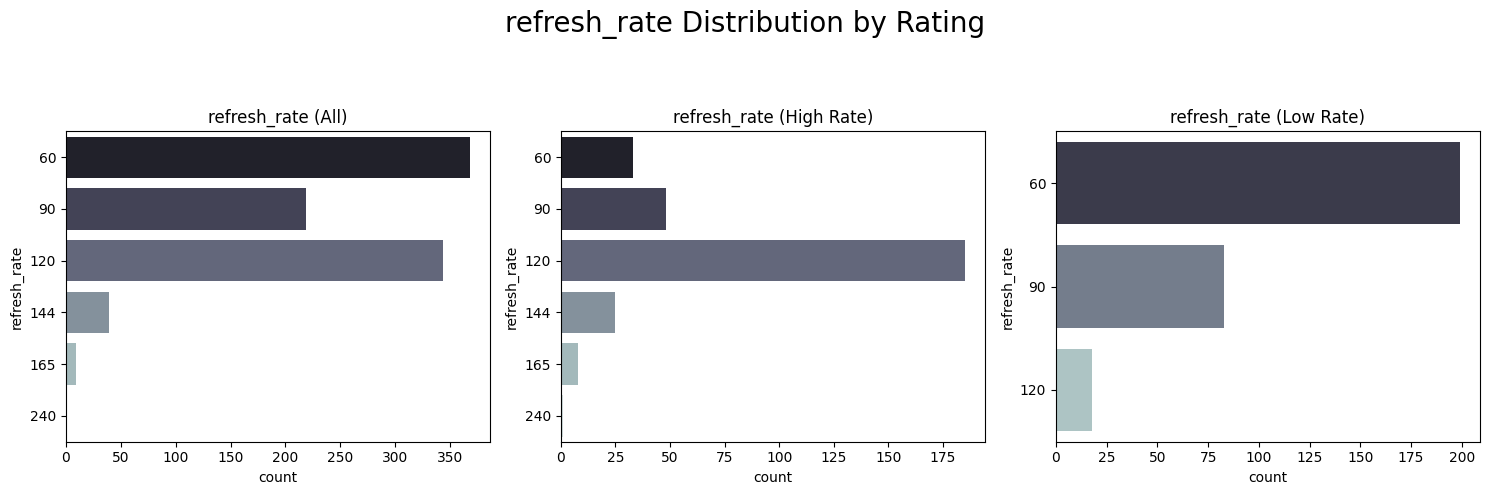

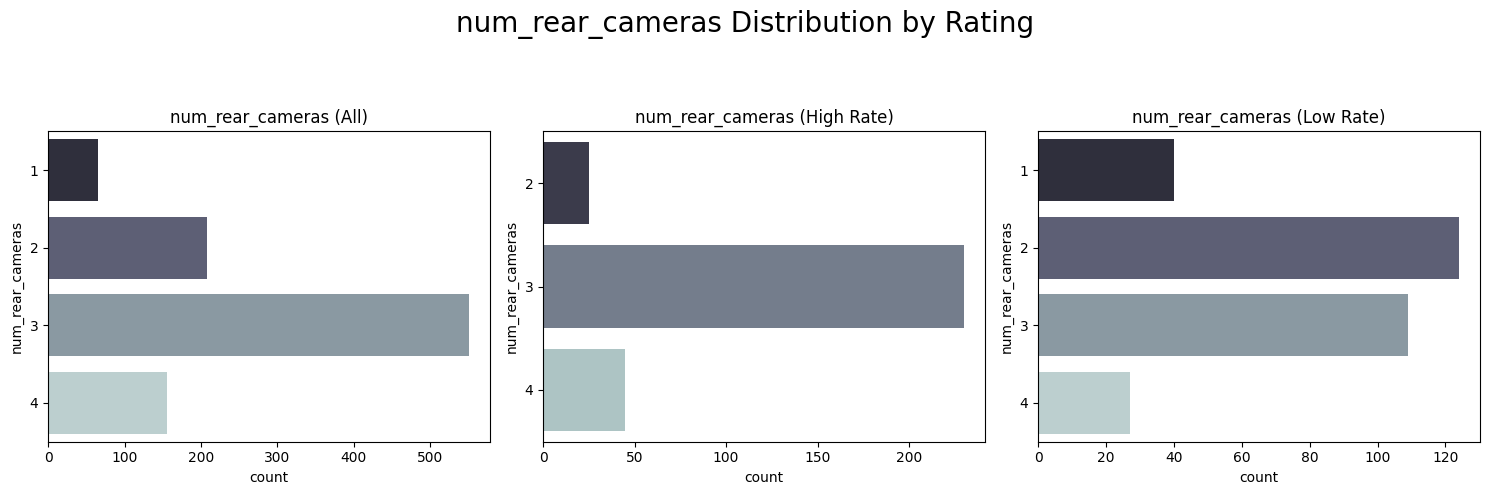

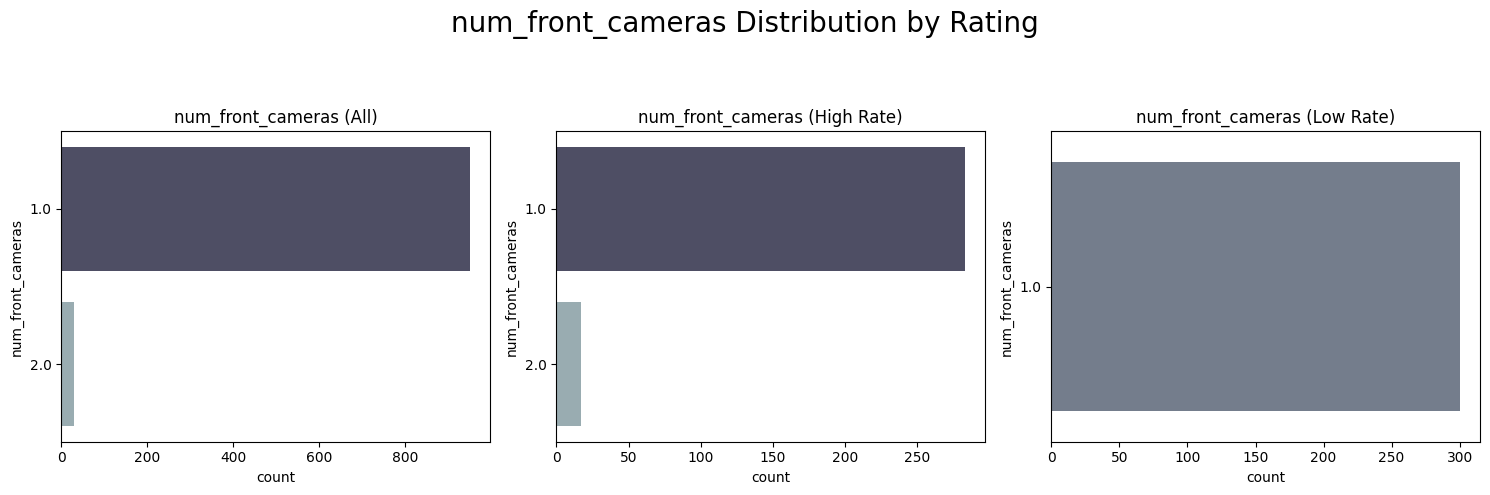

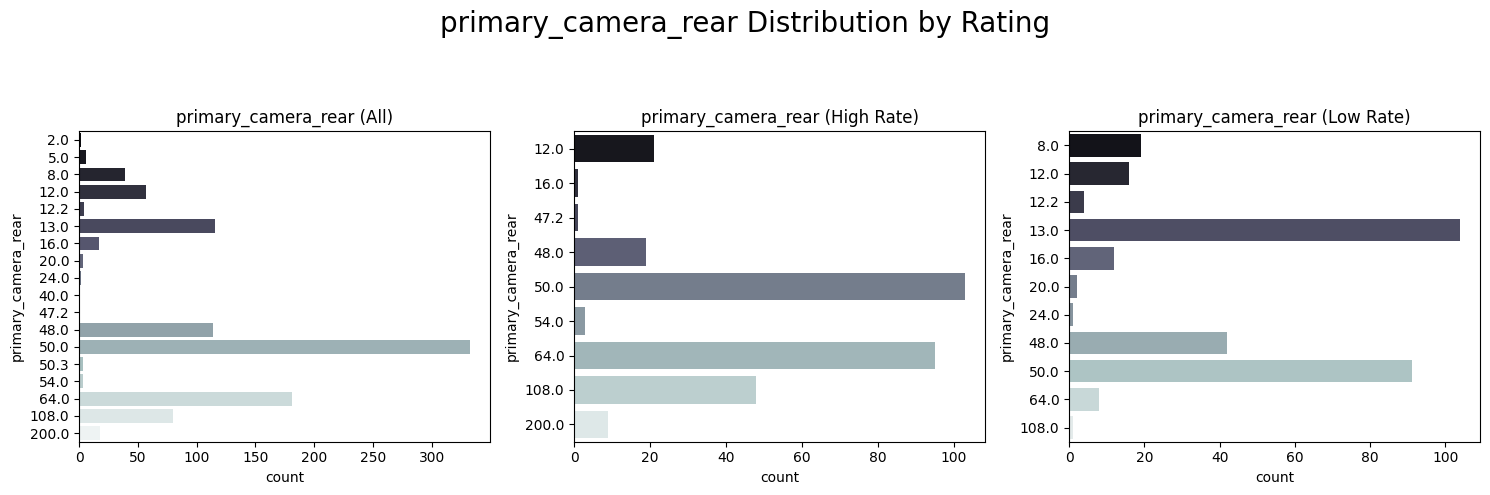

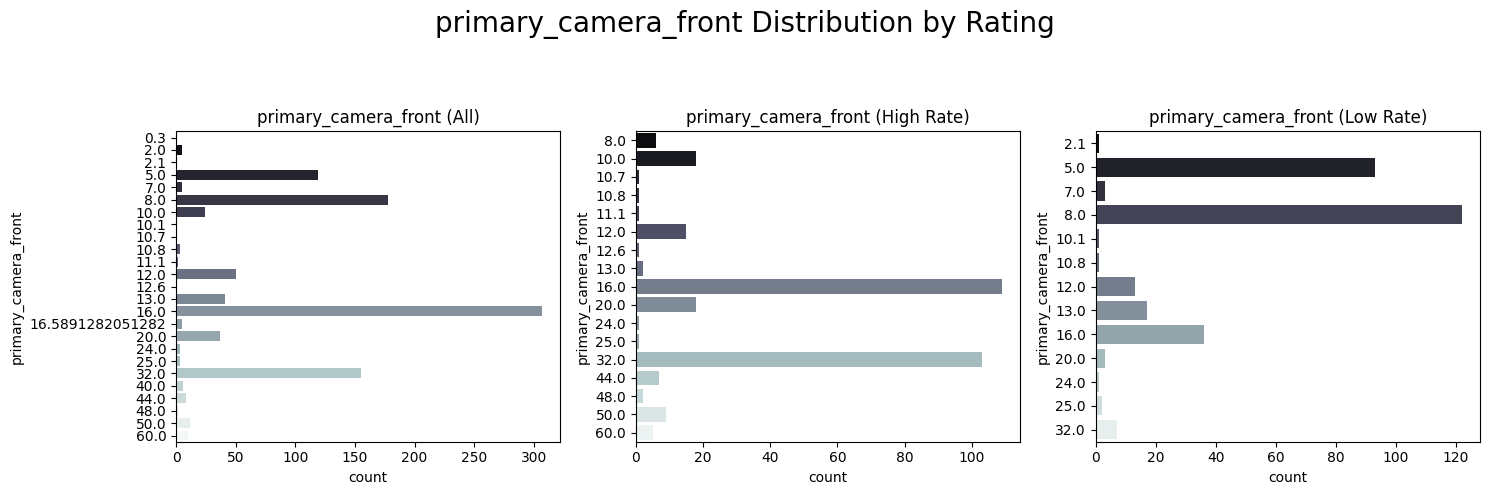

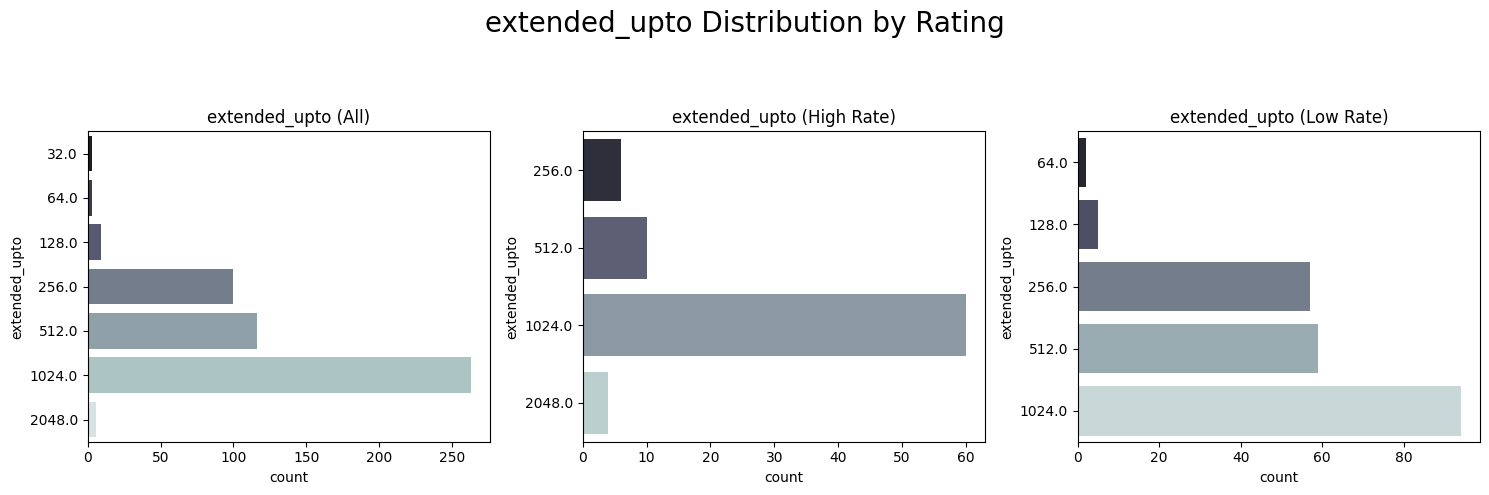

In [ ]:
for col in bar_cols:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, dataset in enumerate([df, high_rate, low_rate]):
        sns.countplot(data=dataset, y=col, palette = 'bone', ax=ax[i])

        title_suffix = ['(All)', '(High Rate)', '(Low Rate)'][i]
        ax[i].set_title(f'{col} {title_suffix}')

    plt.suptitle(f'{col} Distribution by Rating', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.show()

[num_cores]: LOW PRIORITY.

- Most of the phones in the dataset (at least 90%) have 8 cores. This distribution applies to HR phones and LR phones.

[ram_capacity]: HIGH PRIORITY

- The ram capacity distribution is pretty even, with most phones in the dataset having 4, 6 or 8 gigs of RAM capacity. 1/3 of the phones have 8.

- Most of the HR phones have at least 8 gigs of ram capacity, and it doesn't go below 6.

- Most of the LR phones phones have 4 or less gigs of RAM capacity.

[internal_memory]: MEDIUM PRIORITY

- Around 60% of the phones in the dataset have 128 gigs of internal memory. The rest typically have either 64 (seen in the LR phones) and 256 (seen in the HR phones.)

- HR phones don't go below 128 gigs. About 60% of them have 128, and the remaining 30-40% have 256. (generally higher)

- About 60% of LR phones have 64 ___ of internal memory, and the remaining 30/40% have 128. (generally lower)

[refresh_rate]: HIGH PRIORITY

- Around 40% of phones have a refresh rate of 60 frames, another 40% have 120 frames, and the remaining 20% have 90 frames or other.

- HR phones mostly have a refresh rate of 120 frames, and seldom go below 90.

- LR phones mostly have a refresh rate of 60 frames and seldom go above 90.

[num_rear_cameras]: MEDIUM LOW PRIORITY

- Around 60% of the phones have 3 cameras, and the rest are somewhat evenly distributed.

- HR phones mostly have 3 cameras.

- LR phones mostly have 2 or 3 cameras.

[num_front_cameras]: LOW PRIORITY

- more than 90% of the phones have 1 front camera. This distribution applies to HR and LR phones.

[primary_camera_rear]: MEDIUM PRIORITY

- The top 4 MP for rear cameras for phones in this dataset are 50, 64, 48 and 13. They take up approximately 75% of the data. 50 MP is the largest by a decent chunk.

- About 60% of the HR phones have either 50 or 64 MP. (generally higher)

- About 60% of the LR phones have either 13 or 50 MP. (generally lower.)

[primary_camera_front]: HIGH PRIORITY

- The top 4 MP for front cameras for phones in this dataset are 16, 8, 32 and 5. They take up approximately 75% of the data.

- About 75% of the HR phones have either 50, 64 or 108 MP. (generally higher)

- About 75% of the LR phones have 13, 48 or 50 MP. (generally lower.)

[extended_upto_rating]: INSUFFICIENT DATA

- Too much data is missing from this category to make a good estimate.

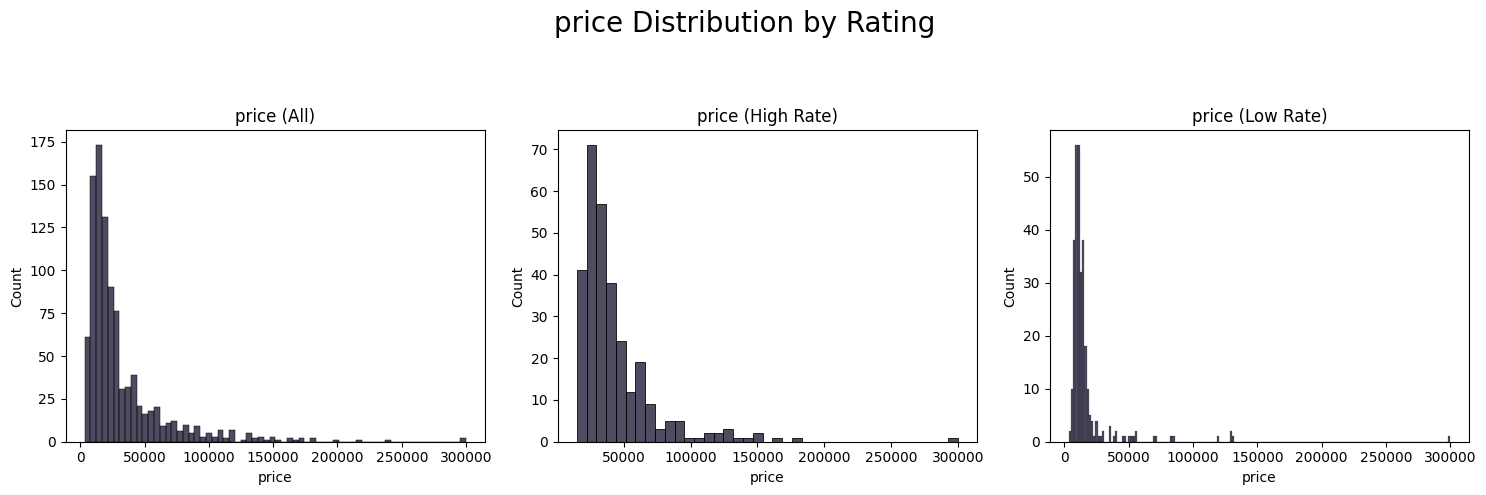

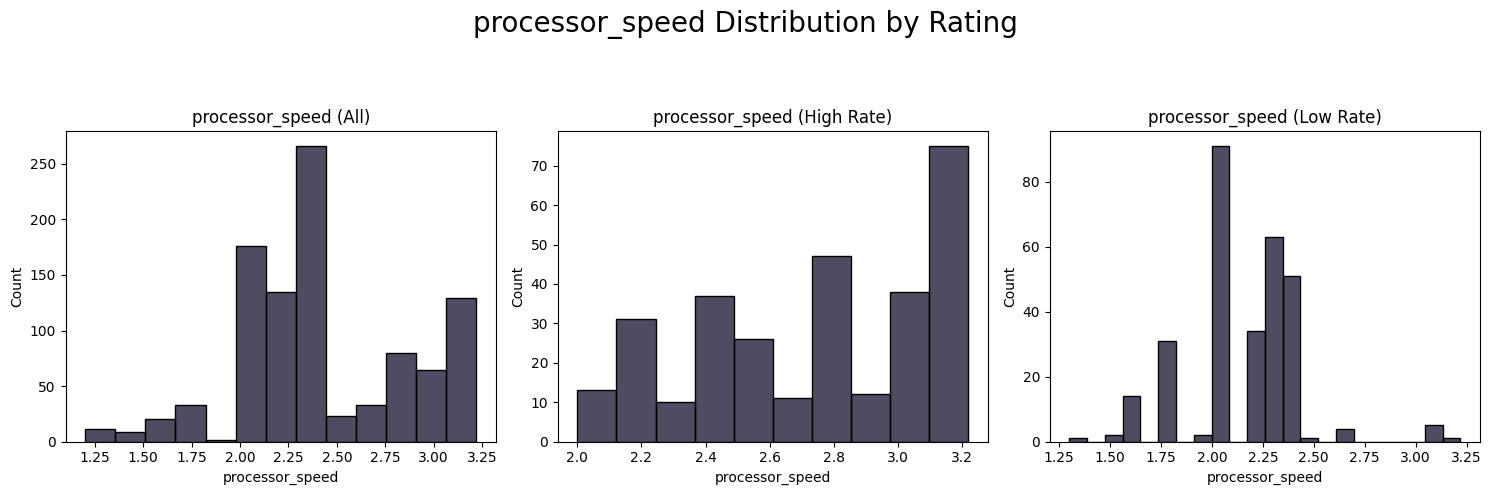

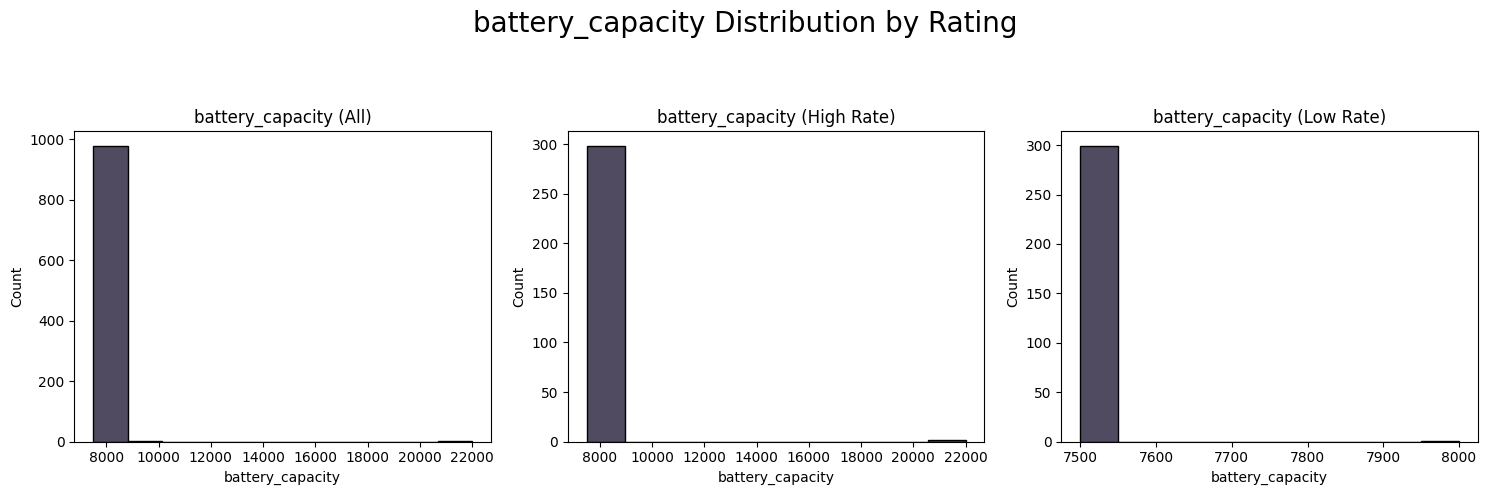

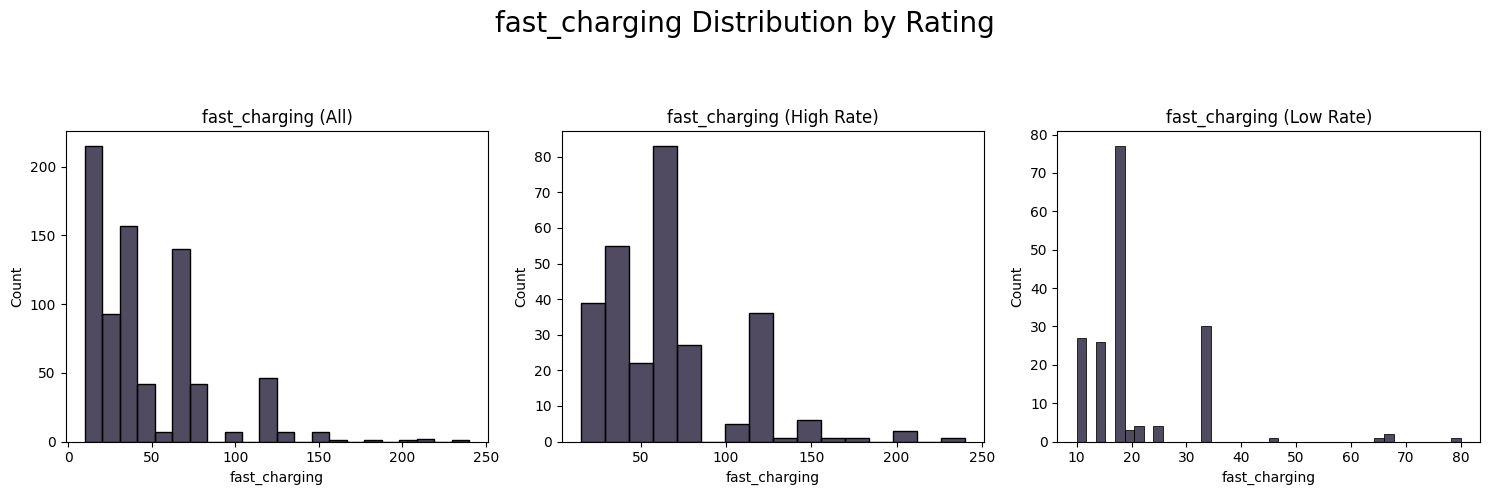

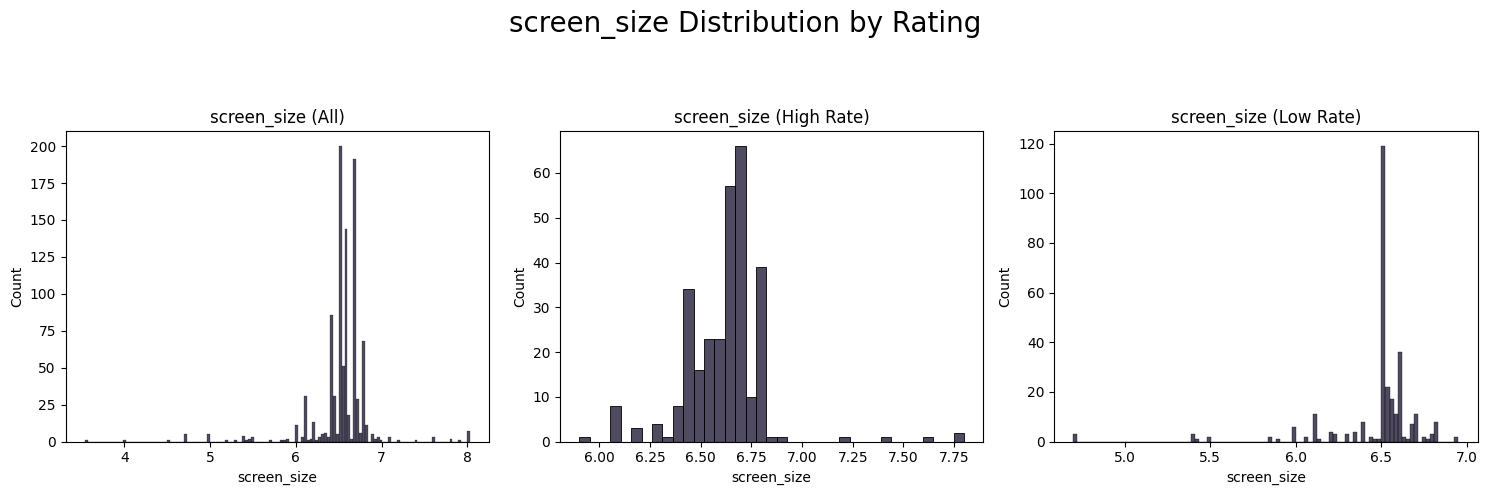

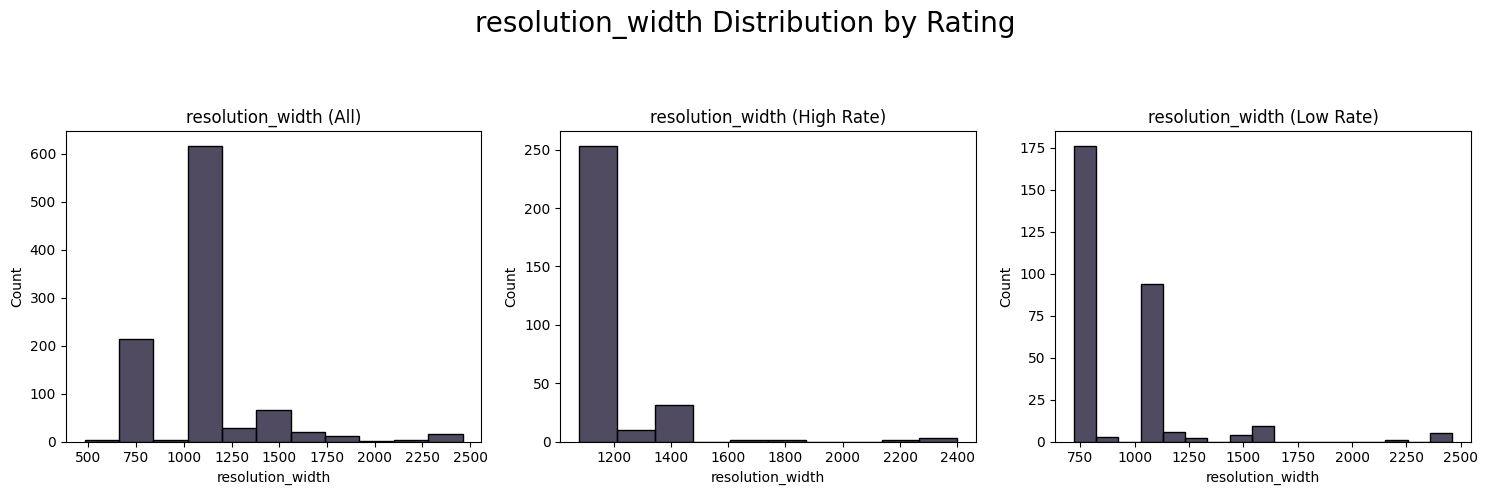

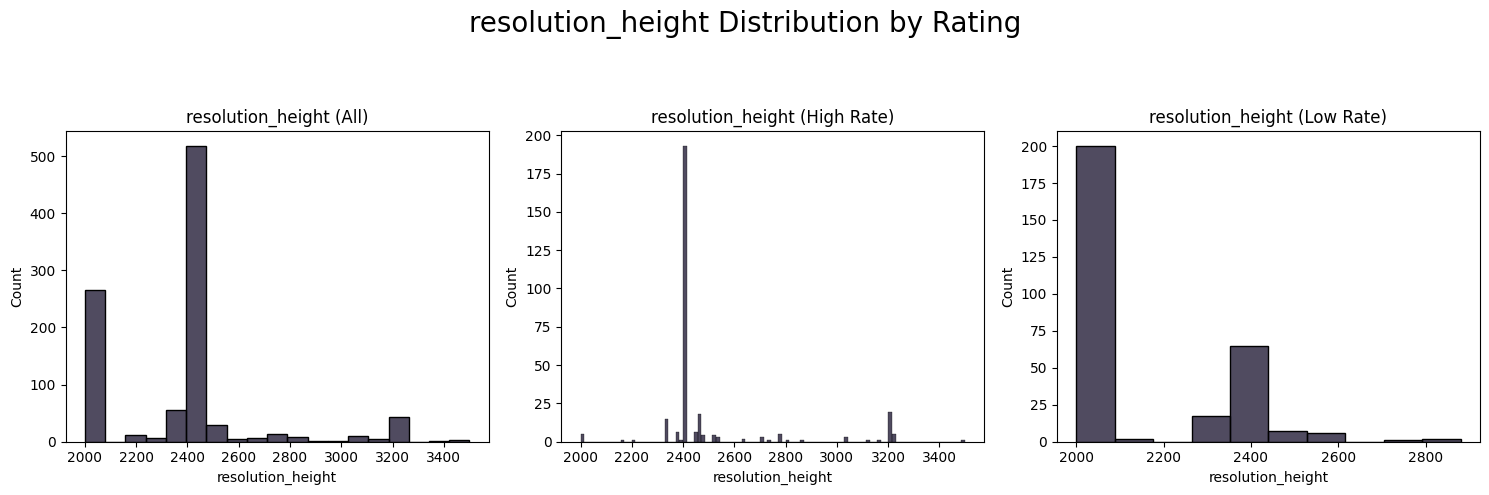

In [ ]:
for col in hist_cols:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, dataset in enumerate([df, high_rate, low_rate]):
        sns.histplot(data=dataset, x=col, color = '#150F2B', ax=ax[i])

        title_suffix = ['(All)', '(High Rate)', '(Low Rate)'][i]
        ax[i].set_title(f'{col} {title_suffix}')

    plt.suptitle(f'{col} Distribution by Rating', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.show()

**Observations:**

[price]: HIGH PRIORITY

- Most of the phones in the dataset have a price hovering around 5000-25,000 rupees.
- There is a slight negative linear relationship with price and distribution.
- HR phones tend to be much more expensive then Low Rate phones. The LR phones don't usually go above 20,000, but a majority of the HR phones are 25,000+ rupees.

[processor_speed]: MEDIUM PRIORITY

- Most of the phones in the dataset have a processor speed higher than 2.0.
- HR phones don't have processor speeds lower than 2.0 at all.  The range is 2.0 to 3.2.
- The processing speed of LR phones almost never exceeds 2.50. The overall range is roughly 1.5 to 2.5.

[battery_capacity]: LOW PRIORITY

- Most phones across all distributions a battery capacity of around 8000.

[fast_charging] MEDIUM HIGH PRIORITY

- Most of the phones in the dataset have fast charging levels between 1 and 100.
- HR phones and LR phones tend to stay in the overall range (but slightly higher).
- LR phones are markedly lower, barely ever going above 40.

[screen_size] LOW PRIORITY

- Most of the phones in the dataset have screen sizes between 6 and 7 inches.
- HR phones and LR phones tend to stay in the overall range. HR phones are barely higher, and LR phones are barely lower.

[resolution_width]: MEDIUM PRIORITY

- Most of the phones in the dataset have a resolution width around 1,000 or 750. HR phones and LR phones take up the higher and lower ends of this distribution.

[resolution_height]: MEDIUM PRIORITY

- Most of the phones in the dataset have a resolution height around 2,500. HR phones are barely higher and LR phones are barely lower.

## Insights and Conclusions

**High priorities (7) for crafting an HR phone include:**

- Having an NFC, having 5g, having fast charging, processor brand.
- High ram capacity, high refresh rate, high MP for front cameras.

**Medium priorities (7) for crafting an HR phone include:**

- Medium/High: High fast charging level.

- Medium: High processor speed, high resolution (width and height), high internal memory, high primary camera MP.

- Medium/Low: Number of rear cameras.

**Low priorities (7) for crafting an HR phone include:**

- Having an IR blaster, choice of operating system.
- battery capacity, screen size, number of cores, number of front cameras, brand name.

- **NOTE**: Most low priority features were ranked low because of homogenous distribution across the dataset. This means that they aren't necessarily low priority, but rather that if they are kept at the level represented by the dataset, it will keep the rating stable.

**Final Observations:**

- HR phones tend to have a higher price point. It seems the high price point has minimal impact on a phone's rating, meaning people in this dataset are willing to pay for quality without complaining about it.

- As a general rule, HR phones tend to have access to more features, and those features tend to be higher quality than LR phones. This makes logical sense. The only exception to this rule is [extended_memory_available]. This could mean that one should invest in other features instead of extended memory space if they want to craft an HR phone.

- I was originally planning to do a price analysis alongside the ratings analysis, but the above information more efficiently gave me the answer I needed: If HR phones generally have a higher price point and more/higher quality features, then the same is likely true when looking at the phone's price point instead of it's rating.

- I checked earlier with a deleted plot to confirm a suspicion, and it turns out Helios brand phones tend to be both cheaper and have a lower rating, lending further credence to the above information.

- As long as you ensure the phone has fast charging, the level of fast charging is less important.

